In [1]:
import pandas as pd
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

%matplotlib notebook

In [2]:
df = pd.read_csv("data.csv")
df.columns = ['x', 'y', 'z', 'x_std', 'y_std', 'z_std','gnd_x','gnd_y','gnd_z']
df["x+"] = df["x"] + df["x_std"]
df["y+"] = df["y"] + df["y_std"]
df["z+"] = df["z"] + df["z_std"]
df["x-"] = df["x"] - df["x_std"]
df["y-"] = df["y"] - df["y_std"]
df["z-"] = df["z"] - df["z_std"]

df.head()


,x,y,z,x_std,y_std,z_std,gnd_x,gnd_y,gnd_z,x+,y+,z+,x-,y-,z-
0,1.71260,-1.08091,1.30567,0.055226,0.068434,0.092044,1.68938,-0.956122,1.47967,1.767826,-1.012476,1.397714,1.657374,-1.149344,1.213626
1,1.72121,-1.09786,1.28787,0.052122,0.064954,0.088097,1.67567,-1.048670,1.38077,1.773332,-1.032906,1.375967,1.669088,-1.162814,1.199773
2,1.74970,-1.10139,1.26184,0.051221,0.063720,0.085959,1.74542,-0.916445,1.21525,1.800921,-1.037670,1.347799,1.698479,-1.165110,1.175881
3,1.76584,-1.11986,1.24680,0.050911,0.063280,0.084781,1.82546,-1.111710,1.11120,1.816751,-1.056580,1.331581,1.714929,-1.183140,1.162019
4,1.78111,-1.14126,1.23654,0.050776,0.063093,0.084081,1.85649,-1.324210,1.09577,1.831886,-1.078167,1.320621,1.730334,-1.204353,1.152459


<IPython.core.display.Javascript object>


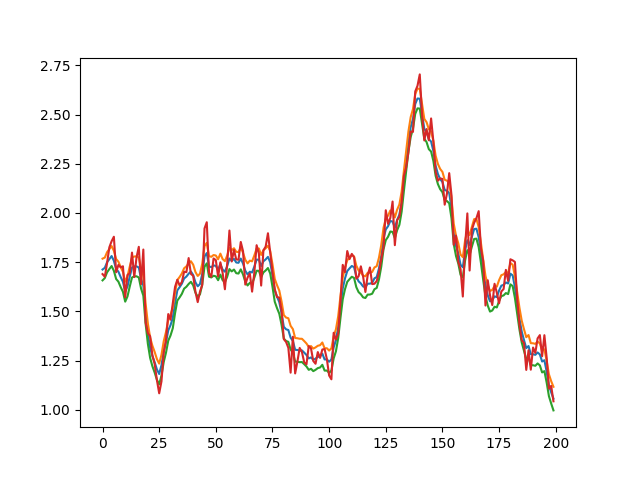

<IPython.core.display.Javascript object>


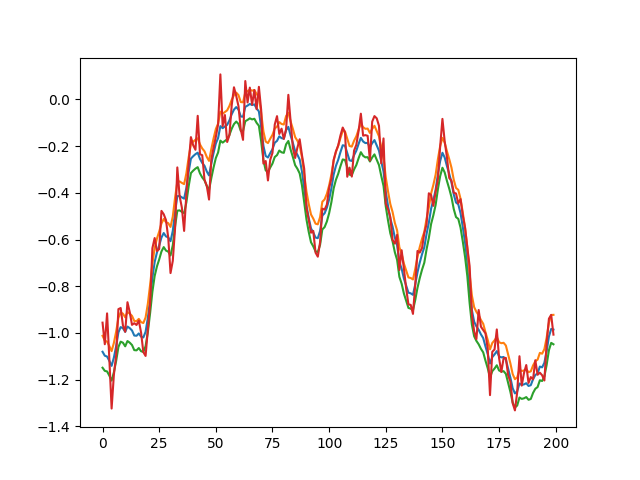

<IPython.core.display.Javascript object>


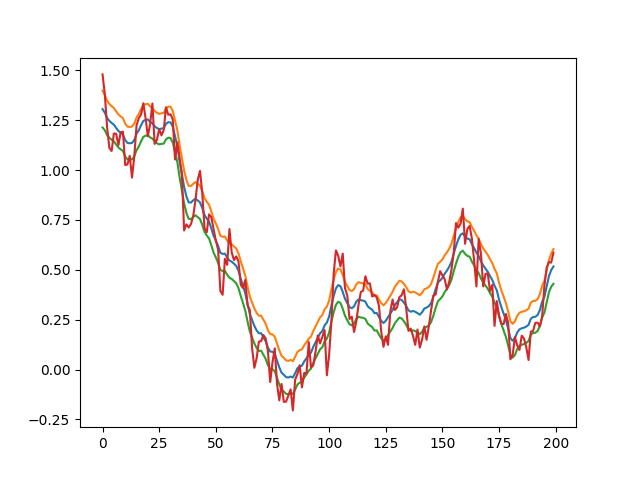

In [3]:
plt.plot(df.index, df['x'])
plt.plot(df.index, df['x+'])
plt.plot(df.index, df['x-'])
plt.plot(df.index, df['gnd_x'])

plt.figure()

plt.plot(df.index, df['y'])
plt.plot(df.index, df['y+'])
plt.plot(df.index, df['y-'])
plt.plot(df.index, df['gnd_y'])


plt.figure()

plt.plot(df.index, df['z'])
plt.plot(df.index, df['z+'])
plt.plot(df.index, df['z-'])
plt.plot(df.index, df['gnd_z'])

plt.show()


<IPython.core.display.Javascript object>


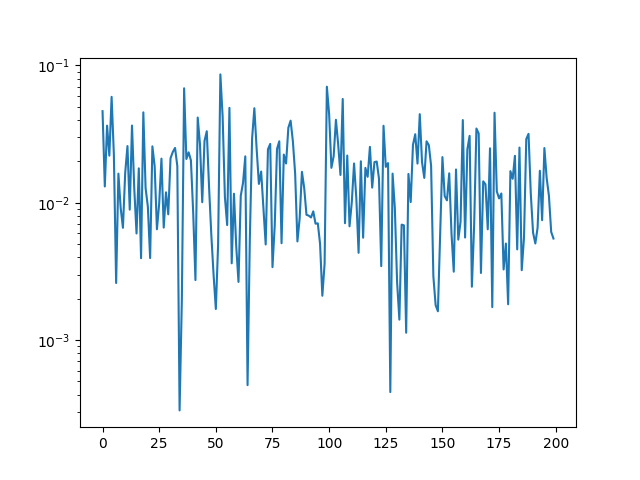

In [4]:
se = (df["x"]-df["gnd_x"])**2 + (df["y"]-df["gnd_y"])**2 + (df["z"]-df["gnd_z"])**2
mse = sum(se)

plt.figure()
plt.yscale("log")
plt.plot(df.index, se)
plt.show()

In [5]:
print(se[75])

0.0033947070366099987


In [6]:
anchors = pd.read_csv("anchors.csv")
anchors.columns = ['x','y','z']
anchors.head()


,x,y,z
0,-0.243932,-2.173640,1.368580
1,-2.150380,0.066539,1.489670
2,0.067212,-1.053270,0.925064
3,0.401399,4.249350,0.743442
4,2.041930,1.566820,-0.255684


<IPython.core.display.Javascript object>


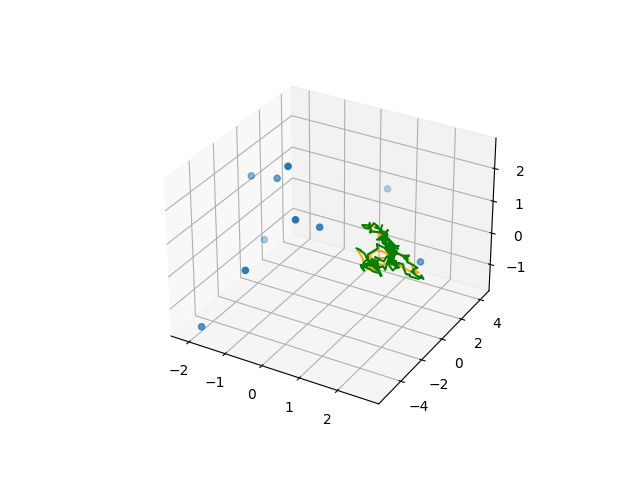

In [7]:
ax = plt.figure().add_subplot(projection='3d')
ax.scatter(anchors['x'], anchors['y'], anchors['z'])
ax.plot(df['x'],df['y'],df['z'], c="orange")
ax.plot(df['gnd_x'],df['gnd_y'],df['gnd_z'], c="green")

